In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearregression import *
%matplotlib inline

In [2]:
plt.rc('font', size=9, weight='light')
plt.rc('axes', axisbelow=True)

In [3]:
# load watershed attribute
def load_attribute():
    elev = pd.read_csv('./data/elev.csv', header=0, usecols=[2,9,10,11], names=['Name', 'Elev',"MAX_Elev", 'Precip'])
    df1 = pd.read_excel('./data/Sediment Yield Field Data set_1 (Han River Watershed)/Data_set-Han_18May2016.xlsx',
                        sheet_name='Han R.(H1~H4)',header=0,usecols=[3,4,5,6])
    df2 = pd.read_excel('./data/Sediment Yield Field Data set_1 (Han River Watershed)/Data_set-Han_18May2016.xlsx',
                        sheet_name='Han R.(H5~H7)',header=0,usecols=[3,4,5])
    df3 = pd.read_excel('./data/Sediment Yield Field Data set_2 (Nakdong River Watershed)/Data_set-Nakdong_18May2016.xlsx',
                        sheet_name='Nakdong R.(N1~N5)',header=0,usecols=[3,4,5,6,7])
    df4 = pd.read_excel('./data/Sediment Yield Field Data set_2 (Nakdong River Watershed)/Data_set-Nakdong_18May2016.xlsx',
                        sheet_name='Nakdong R.(N6~N10)',header=0,usecols=[3,4,5,6,7])
    df5 = pd.read_excel('./data/Sediment Yield Field Data set_2 (Nakdong River Watershed)/Data_set-Nakdong_18May2016.xlsx',
                        sheet_name='Nakdong R.(N11~N14)',header=0,usecols=[3,4,5,6])
    df6 = pd.read_excel('./data/Sediment Yield Field Data set_5 (Seomjin River Watershed)/Data_set-Geum~Seomjin_18May2016.xlsx',
                        sheet_name='Geum R.(G1~G5)',header=0,usecols=[3,4,5,6,7])
    df7 = pd.read_excel('./data/Sediment Yield Field Data set_5 (Seomjin River Watershed)/Data_set-Geum~Seomjin_18May2016.xlsx',
                        sheet_name='Yeongsan R.(Y1~Y5)',header=0,usecols=[3,4,5,6,7])
    df8 = pd.read_excel('./data/Sediment Yield Field Data set_5 (Seomjin River Watershed)/Data_set-Geum~Seomjin_18May2016.xlsx',
                        sheet_name='Seomjin R.(S1~S4)',header=0,usecols=[3,4,5,6])

    dataList = [df1,df2,df3,df4,df5,df6,df7,df8]

    def removeEmpty(dataframe):
        df = np.array(dataframe)[3:35]
        df = np.delete(df, [2,24], axis=0)
        return df

    def bedsize(dataframe):
        df = dataframe.apply(pd.to_numeric, errors='coerce')
        df = np.array(df)[35:43]

        dmin = np.nanmin(np.float64(df),axis=0)
        dmax = np.nanmax(np.float64(df),axis=0)
        dmean = np.nanmean(np.float64(df),axis=0)
        return np.vstack((dmin,dmax,dmean))
    

    id_list = []
    for l in dataList:
        for n in l.columns:
            id_list.append(n)

    processedDataList = []
    for d in dataList:
        att = removeEmpty(d)
        bed = bedsize(d)
        processed_d = np.concatenate((att,bed), axis=0)
        processedDataList.append(processed_d)

    attri_data = np.hstack((processedDataList[0],processedDataList[1],processedDataList[2],processedDataList[3],
                       processedDataList[4],processedDataList[5],processedDataList[6],processedDataList[7]))
    attri_data = np.transpose(attri_data)


    attribute = pd.concat([pd.DataFrame(id_list,columns=['Name']),pd.DataFrame(np.float64(attri_data))],axis=1)
    attribute.rename(columns = {0:'Area'}, inplace = True)

    attribute = pd.merge(attribute, elev, on='Name')

    col_name = ['Name', 'lon', 'lat','Area', 'Avg_slope', 'Perimeter', 'Main_length',
                'Tributary_length', 'Total_length', 'Density', 'Width',
                'Slope_at_station', 'clay0', 'silt0', 'sand0', 'clay10',
                'silt10','sand10', 'clay30','silt30','sand30','clay50',
                'silt50','sand50','Urban','Agriculture','Forest',
                'Pasture','Wetland','Bare_land','Water','D_min', 'D_max', 'D_mean', 'Elev',"Max_Elev", 'Precip']
    attribute.columns = col_name
    attribute = attribute.set_index(["Name"])
    return attribute

attribute = load_attribute()

In [4]:
mep_sy = [133.25, 529.71, 1101.3, 308.13, 453.4, 24.79, 90.21, 63.49, 49.68, 19.58, 46.02, 58, 4.52, 99.12, 33.72, 150.28,
         74.63, 38.4, 47.59, 57.21, 47.82, 126.28, 127.56, 151.42, 59.72, 61.91, 97.43, 124.74, 163.58, 45.74, 40.34, 31.85,
         44.4, 45.15, 28.43]

In [5]:
def model_yoon(area, slope, ds):
    return 2.65 * 43954 * area**0.464 * slope**-2 * ds**-0.855

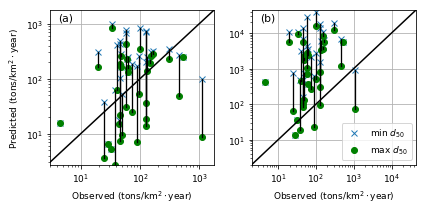

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,3))

ax1.plot(mep_sy, 972*(attribute['Density']/1000)**1.039*attribute['D_min']**-0.825, 'x', label='min $d_{50}$')
ax1.plot(mep_sy, 972*(attribute['Density']/1000)**1.039*attribute['D_max']**-0.825, 'go', label='max $d_{50}$')
ax1.plot([mep_sy, mep_sy], [972*(attribute['Density']/1000)**1.039*attribute['D_min']**-0.825, 972*(attribute['Density']/1000)**1.039*attribute['D_max']**-0.825], 'k-', linewidth=1.3)
ax1.plot([3,1800], [3, 1800], 'k-')


ax2.plot(mep_sy, model_yoon(attribute['Area'], attribute['Avg_slope'], attribute['D_min'])*1.3, 'x', label='min $d_{50}$')
ax2.plot(mep_sy, model_yoon(attribute['Area'], attribute['Avg_slope'], attribute['D_max'])*1.3, 'go', label='max $d_{50}$')
ax2.plot([mep_sy, mep_sy], [model_yoon(attribute['Area'], attribute['Avg_slope'], attribute['D_min'])*1.3, 1.3*model_yoon(attribute['Area'], attribute['Avg_slope'], attribute['D_max'])], 'k-', linewidth=1.3)
ax2.plot([2,45000], [2, 45000], 'k-')

for ax in [ax1, ax2]:
    ax.margins(x=0, y=0)
    ax.grid()
    ax.set_xlabel('Observed (tons/km$^2\cdot$year)')
    ax.set(xscale='log', yscale='log')
    
ax1.set_ylabel('Predicted (tons/km$^2\cdot$year)')
ax1.annotate('(a)', (0.05, 0.93), xycoords='axes fraction', fontsize='large')
ax2.annotate('(b)', (0.05, 0.93), xycoords='axes fraction', fontsize='large')

ax2.legend(loc=4)
ax1.annotate
fig.tight_layout()
#fig.savefig('kict_and_yoon.pdf', format='')

In [7]:
kict1 = 972*(attribute['Density']/1000)**1.039*attribute['D_min']**-0.825
kict2 = 972*(attribute['Density']/1000)**1.039*attribute['D_max']**-0.825

In [17]:
(mape(kict1, mep_sy) + mape(kict2, mep_sy))/2

3.085163401564369

In [8]:
(rmse(kict1, mep_sy) , mape(kict1, mep_sy))

(378.24882118154335, 4.038856935208931)

In [9]:
(rmse(kict2, mep_sy) , mape(kict2, mep_sy))

(269.24978391034716, 2.1314698679198076)

In [10]:
yoon1 = model_yoon(attribute['Area'], attribute['Avg_slope'], attribute['D_max'])*1.3
yoon2 = model_yoon(attribute['Area'], attribute['Avg_slope'], attribute['D_min'])*1.3

In [20]:
(mape(yoon1, mep_sy) + mape(yoon2, mep_sy) )/2

65.08284839380924

In [12]:
( , mape(yoon2, mep_sy))

(10549.038934454185, 92.02346368472574)